# Numerical Solvers for Fractional Differential Equations

@[Chaoming Wang](mailto:adaduo@outlook.com)

In [1]:
import matplotlib.pyplot as plt

import brainpy as bp
import brainpy.math as bm

bp.__version__

'2.3.0'

Factional differential equations have several definitions. It can be defined in a variety of different ways that do often do not all lead to the same result even for smooth functions. In neuroscience, we usually use the following two definitions:

- Grünwald-Letnikov derivative
- Caputo fractional derivative

See [Fractional calculus - Wikipedia](https://en.wikipedia.org/wiki/Fractional_calculus) for more details.

## Methods for Caputo FDEs

For a given fractional differential equation

$$
\frac{d^{\alpha} x}{d t^{\alpha}}=F(x, t)
$$

where the fractional order $0<\alpha\le 1$. BrainPy provides two kinds of methods:

- Euler method - ``brainpy.fde.CaputoEuler``
- L1 schema integration - ``brainpy.fde.CaputoL1Schema``

### ``brainpy.fde.CaputoEuler``

``brainpy.fed.CaputoEuler`` provides one-step Euler method for integrating Caputo fractional differential equations.

Given a fractional-order Qi chaotic system

$$
\left\{\begin{array}{l}
D^{\alpha} x_{1}=a\left(x_{1}-x_{2}\right)+x_{2} x_{3} \\
D^{\alpha} x_{2}=c x_{1}-x_{2}-x_{1} x_{3} \\
D^{\alpha} x_{3}=x_{1} x_{2}-b x_{3}
\end{array}\right.
$$

we can solve the equation system by:


In [2]:
a, b, c = 35, 8 / 3, 80


def qi_system(x, y, z, t):
  dx = -a * x + a * y + y * z
  dy = c * x - y - x * z
  dz = -b * z + x * y
  return dx, dy, dz

In [3]:
dt = 0.001
duration = 50
inits = [0.1, 0.2, 0.3]

# The numerical integration of FDE need to know all
# history information, therefore, we need provide
# the overall simulation time "num_step" to save
# all history values.
integrator = bp.fde.CaputoEuler(qi_system,
                                alpha=0.98,  # fractional order
                                num_memory=int(duration / dt),
                                inits=inits)

runner = bp.IntegratorRunner(integrator,
                             monitors=list('xyz'),
                             inits=inits,
                             dt=dt)
runner.run(duration)

  0%|          | 0/50000 [00:00<?, ?it/s]

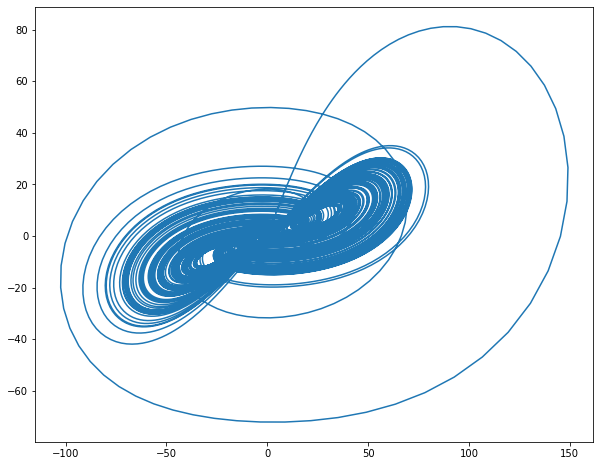

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(runner.mon.x, runner.mon.y)
plt.show()

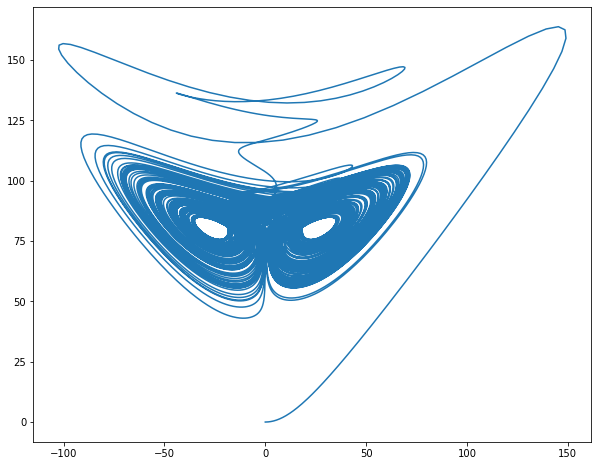

In [5]:
plt.figure(figsize=(10, 8))
plt.plot(runner.mon.x, runner.mon.z)
plt.show()

### ``brainpy.fde.CaputoL1Schema``

``brainpy.fed.CaputoL1Schema`` is another commonly used method to integrate Caputo derivative equations. Let's try it with a fractional-order Lorenz system, which is given by:

$$
\left\{\begin{array}{l}
D^{\alpha} x=a\left(y-x\right) \\
D^{\alpha} y= x * (b - z) - y \\
D^{\alpha} z =x * y - c * z
\end{array}\right.
$$


In [6]:
a, b, c = 10, 28, 8 / 3


def lorenz_system(x, y, z, t):
  dx = a * (y - x)
  dy = x * (b - z) - y
  dz = x * y - c * z
  return dx, dy, dz

In [7]:
dt = 0.001
duration = 50
inits = [1, 2, 3]

integrator = bp.fde.CaputoL1Schema(lorenz_system,
                                   alpha=0.99,  # fractional order
                                   num_memory=int(duration / dt),
                                   inits=inits)

runner = bp.IntegratorRunner(integrator,
                             monitors=list('xyz'),
                             inits=inits,
                             dt=dt)
runner.run(duration)

  0%|          | 0/50000 [00:00<?, ?it/s]

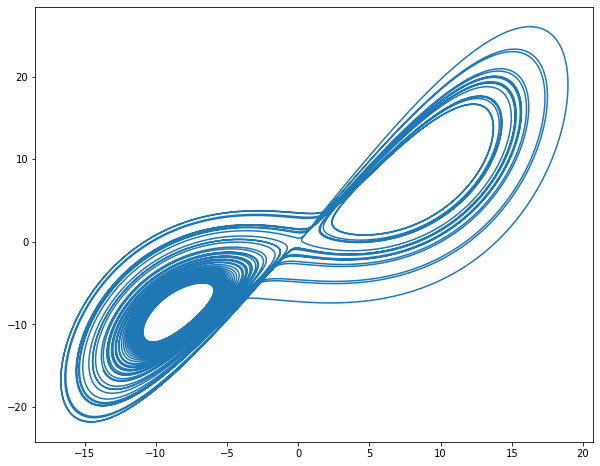

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(runner.mon.x, runner.mon.y)
plt.show()

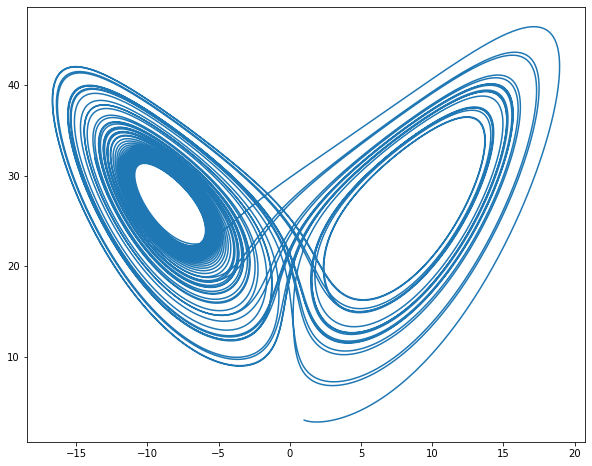

In [9]:
plt.figure(figsize=(10, 8))
plt.plot(runner.mon.x, runner.mon.z)
plt.show()

## Methods for Grünwald-Letnikov FDEs

Grünwald-Letnikov FDE is another commonly-used type in neuroscience. Here, we provide a efficient computation method according to the short-memory principle in Grünwald-Letnikov method.

### ``brainpy.fde.GLShortMemory``

``brainpy.fde.GLShortMemory`` is highly efficient, because it does not require infinity memory length for numerical solution. Due to the decay property of the coefficients, ``brainpy.fde.GLShortMemory`` implements a limited memory length to reduce the computational time. Specifically, it only relies on the memory window of ``num_memory`` length. With the increasing width of memory window, the accuracy of numerical approximation will increase.

Here, we demonstrate it by using a fractional-order Chua system, which is defined as

$$
\left\{\begin{array}{l}
D^{\alpha_{1}} x=a\{y- (1+m_1) x-0.5*(m_0-m_1)*(|x+1|-|x-1|)\} \\
D^{\alpha_{2}} y=x-y+z \\
D^{\alpha_{3}} z=-b y-c z
\end{array}\right.
$$

In [10]:
a, b, c = 10.725, 10.593, 0.268
m0, m1 = -1.1726, -0.7872


def chua_system(x, y, z, t):
  f = m1 * x + 0.5 * (m0 - m1) * (abs(x + 1) - abs(x - 1))
  dx = a * (y - x - f)
  dy = x - y + z
  dz = -b * y - c * z
  return dx, dy, dz

In [11]:
dt = 0.001
duration = 200
inits = [0.2, -0.1, 0.1]

integrator = bp.fde.GLShortMemory(chua_system,
                                  alpha=[0.93, 0.99, 0.92],
                                  num_memory=1000,
                                  inits=inits)

runner = bp.IntegratorRunner(integrator,
                             monitors=list('xyz'),
                             inits=inits,
                             dt=dt)
runner.run(duration)

  0%|          | 0/200000 [00:00<?, ?it/s]

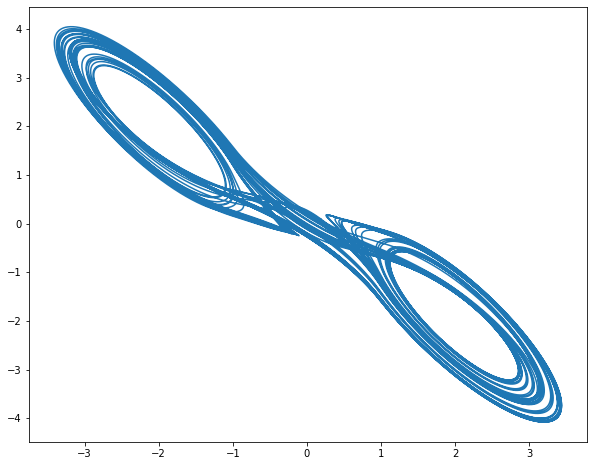

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(runner.mon.x, runner.mon.z)
plt.show()

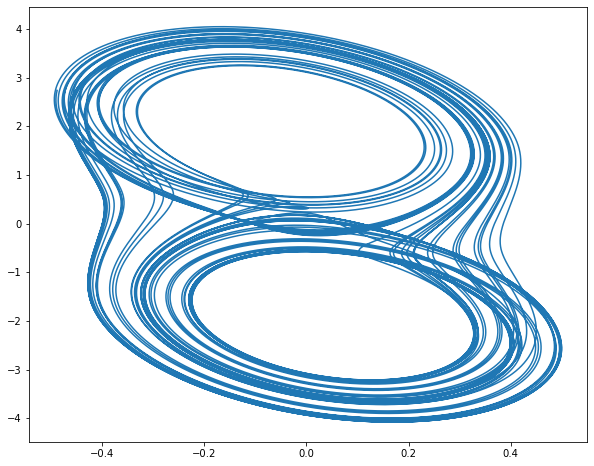

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(runner.mon.y, runner.mon.z)
plt.show()

Actually, the coefficient used in ``brainpy.fde.GLWithMemory`` can be inspected through:

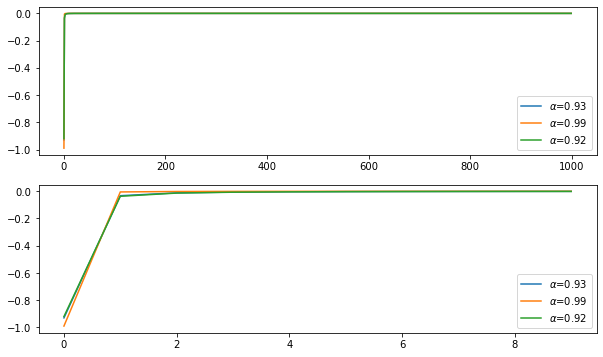

In [14]:
plt.figure(figsize=(10, 6))
coef = integrator.binomial_coef
alphas = bm.as_numpy(integrator.alpha)

plt.subplot(211)
for i in range(3):
  plt.plot(coef[:, i], label=r'$\alpha$=' + str(alphas[i]))
plt.legend()
plt.subplot(212)
for i in range(3):
  plt.plot(coef[:10, i], label=r'$\alpha$=' + str(alphas[i]))
plt.legend()
plt.show()

As you see, the coefficients decay very quickly!

## Further reading

More examples of how to use numerical solvers of fractional differential equations defined in BrainPy, please see:

- [(Mondal, et, al., 2019): Fractional-order FitzHugh-Rinzel bursting neuron model](https://brainpy-examples.readthedocs.io/en/latest/neurons/2019_Fractional_order_FHR_model.html)
- [(Teka, et. al, 2018): Fractional-order Izhikevich neuron model](https://brainpy-examples.readthedocs.io/en/latest/neurons/2018_Fractional_Izhikevich_model.html)
- [Fractional-order Chaos Gallery](https://brainpy-examples.readthedocs.io/en/latest/classical_dynamical_systems/fractional_order_chaos.html)